[[ 0.99501247  0.09975062]
 [-0.09975062  0.99501247]]


<ipython-input-10-4d9d063117e7>:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([t,y])


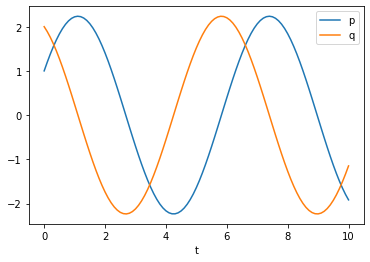

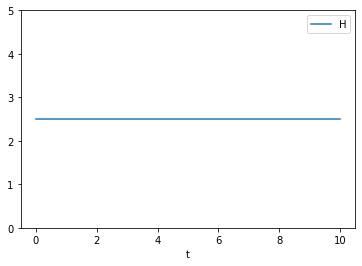

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def ImpMidPoint(y0,T,h):
    
     # Initialize variables
    N = int(np.ceil((T[1]-T[0])/h))# number of steps
    h = (T[1]-T[0])/N # adjust step size to fit interval length
    d = len(y0) # dimension of solution
    t = np.linspace(T[0],T[1],N+1)#### time grid
    y = np.zeros((d,N+1)) # initialise solution
    y[:,0] = y0#### set initial value
    h2=np.power(h,2)
    
    # Define matrices needed for time stepping
    Jinv = np.array([[0,-1],[1,0]])
    A = 1/(1+h2/4)*np.array([[1-h2/4,h],[-h,1-h2/4]])
    print(A)
    
    # Compute solution
    for j in range(0,N):
        y[:,j+1] = np.matmul(A,y[:,j])
      
    return np.array([t,y])

y0 = [1,2]####
T = [0,10]####
h = 0.1####

[t,y] = ImpMidPoint(y0,T,h)

# Plot the solution
plt.plot(t,y[0,:],label="p")
plt.plot(t,y[1,:],label="q")
plt.xlabel("t")
plt.legend(loc="upper right")
plt.savefig("prb2sol.pdf")

# Plot the Hamilonian
plt.figure()
H = (np.square(y[0,:])+np.square(y[1,:]))/2####
plt.plot(t,H,label="H")
plt.xlabel("t")
plt.ylim(0,5)
plt.legend(loc="upper right")
plt.savefig("prb2ham.pdf")